In [128]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

## 1. Statistic - 1 name

In [129]:
dataframe = pd.read_csv('source/nat1900-2017.tsv', sep='\t')
dataframe.rename(columns={"sexe":"Gender", "preusuel":"Name","annais":"Years","nombre":"Number of newborns"}, inplace=True)
dataframe.set_index('Years', inplace=True)
dataframe.drop('XXXX', inplace=True)
dataframe.Gender = dataframe.Gender.map({1:'male', 2:'female'})
dataframe.index = pd.to_numeric(dataframe.index,errors='coerce')


In [130]:
dataframe.head(40)

,Gender,Name,Number of newborns
Years,,,
1980,male,A,3
1998,male,A,3
2009,male,AADAM,4
2014,male,AADAM,3
2016,male,AADAM,4
2017,male,AADAM,4
1976,male,AADEL,5
1978,male,AADEL,3
1980,male,AADEL,3


In [131]:
my_filter = lambda name: dataframe.Name == name
results = dataframe[my_filter('MILENA')]
results

,Gender,Name,Number of newborns
Years,,,
1923,female,MILENA,3
1927,female,MILENA,3
1931,female,MILENA,5
1932,female,MILENA,4
1942,female,MILENA,3
...,...,...,...
2013,female,MILENA,65
2014,female,MILENA,65
2015,female,MILENA,77


In [132]:
filter_years = (results.index >= 1930) & (results.index <= 1990)
results = results[filter_years]
results

,Gender,Name,Number of newborns
Years,,,
1931,female,MILENA,5
1932,female,MILENA,4
1942,female,MILENA,3
1948,female,MILENA,3
1949,female,MILENA,4
1951,female,MILENA,4
1954,female,MILENA,6
1955,female,MILENA,4
1956,female,MILENA,3


In [133]:
results_years = results.loc[:, ['Number of newborns']]
results_years

,Number of newborns
Years,
1931,5
1932,4
1942,3
1948,3
1949,4
1951,4
1954,6
1955,4
1956,3


In [134]:
popularity = results['Number of newborns']
my_bins = [x for x in range(1930,2000, 10)]
list_of_values = []
for key, value in popularity.items():
    for x in range(value):
        list_of_values.append(key)
list_of_values

[1931,
 1931,
 1931,
 1931,
 1931,
 1932,
 1932,
 1932,
 1932,
 1942,
 1942,
 1942,
 1948,
 1948,
 1948,
 1949,
 1949,
 1949,
 1949,
 1951,
 1951,
 1951,
 1951,
 1954,
 1954,
 1954,
 1954,
 1954,
 1954,
 1955,
 1955,
 1955,
 1955,
 1956,
 1956,
 1956,
 1957,
 1957,
 1957,
 1958,
 1958,
 1958,
 1958,
 1959,
 1959,
 1959,
 1959,
 1962,
 1962,
 1962,
 1962,
 1962,
 1963,
 1963,
 1963,
 1963,
 1963,
 1963,
 1963,
 1964,
 1964,
 1964,
 1964,
 1964,
 1965,
 1965,
 1965,
 1966,
 1966,
 1966,
 1966,
 1967,
 1967,
 1967,
 1967,
 1967,
 1967,
 1967,
 1967,
 1967,
 1967,
 1967,
 1967,
 1967,
 1968,
 1968,
 1968,
 1968,
 1968,
 1968,
 1969,
 1969,
 1969,
 1969,
 1969,
 1969,
 1969,
 1969,
 1969,
 1969,
 1970,
 1970,
 1970,
 1970,
 1970,
 1970,
 1970,
 1970,
 1970,
 1971,
 1971,
 1971,
 1971,
 1971,
 1971,
 1971,
 1971,
 1971,
 1971,
 1971,
 1971,
 1971,
 1971,
 1971,
 1971,
 1971,
 1972,
 1972,
 1972,
 1972,
 1972,
 1972,
 1972,
 1972,
 1972,
 1972,
 1972,
 1972,
 1972,
 1973,
 1973,
 1973,
 1973,

Text(0.5, 1.0, 'Popularity of the name "Milena" in France')

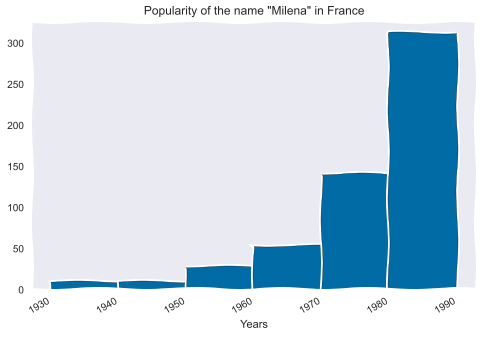

In [135]:
plt.hist(list_of_values,bins=my_bins, edgecolor='black')
plt.gcf().autofmt_xdate(rotation = 30)
plt.xlabel('Years')
plt.title(f'Popularity of the name "Milena" in France')

In [136]:
results = results.groupby(pd.cut(results.index, np.arange(1930,1970, 10))).sum()

indexes = [''.join((str(x), '-', str(x+10))) for x in range(1930,1960, 10)]
results.index = indexes
results

,Number of newborns
1930-1940,9
1940-1950,10
1950-1960,28


In [137]:
records = dict(results['Number of newborns'])
records

{'1930-1940': 9, '1940-1950': 10, '1950-1960': 28}

In [138]:
records.values()

dict_values([9, 10, 28])

In [139]:
records.keys()

dict_keys(['1930-1940', '1940-1950', '1950-1960'])

<BarContainer object of 3 artists>

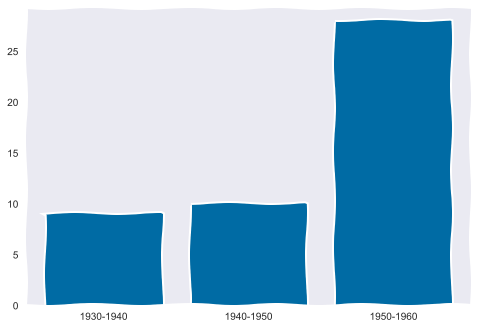

In [140]:
x_labels = records.keys()
y_labels = records.values()

plt.bar(x_labels, y_labels)

## 2. Compare names

In [141]:
dataframe = pd.read_csv('source/nat1900-2017.tsv', sep='\t')
dataframe.rename(columns={"sexe":"Gender", "preusuel":"Name","annais":"Years","nombre":"Number of newborns"}, inplace=True)
dataframe.set_index('Years', inplace=True)
dataframe.drop('XXXX', inplace=True)
dataframe.Gender = dataframe.Gender.map({1:'male', 2:'female'})
dataframe.index = pd.to_numeric(dataframe.index,errors='coerce')

In [142]:
my_filter = lambda name: dataframe.Name == name

first = dataframe[my_filter('ROBERT')]
second = dataframe[my_filter('MARIE')]

In [143]:
values_first = []
values_second = []

results_first = first['Number of newborns']
results_second = second['Number of newborns']

for key, value in results_first.items():
    for x in range(value):
        values_first.append(key)

for key, value in results_second.items():
    for x in range(value):
        values_second.append(key)
        
print(values_first, end=', ')

[1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 190

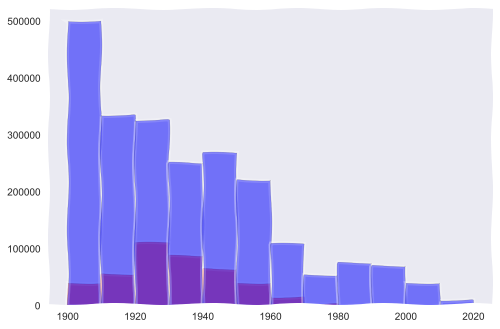

In [144]:
my_bins = [x for x in range(1900, 2030, 10)]
plt.hist(values_first,bins=my_bins, color='red', alpha=0.3, edgecolor='black')
plt.hist(values_second,bins=my_bins, color='blue', alpha=0.3, edgecolor='black')
plt.show()

## 3. General statistics

In [145]:
dataframe = pd.read_csv('source/nat1900-2017.tsv', sep='\t')
dataframe.rename(columns={"sexe":"Gender", "preusuel":"Name","annais":"Years","nombre":"Number of newborns"}, inplace=True)
dataframe.index += 1
dataframe.Gender = dataframe.Gender.map({1:'male', 2:'female'})
dataframe.index = pd.to_numeric(dataframe.index,errors='coerce')

In [146]:
dataframe.head(10)

,Gender,Name,Years,Number of newborns
1,male,A,1980,3
2,male,A,1998,3
3,male,A,XXXX,22
4,male,AADAM,2009,4
5,male,AADAM,2014,3
6,male,AADAM,2016,4
7,male,AADAM,2017,4
8,male,AADAM,XXXX,9
9,male,AADEL,1976,5
10,male,AADEL,1978,3


In [147]:
dataframe_grouped = dataframe.groupby(['Name', 'Gender']).sum()
dataframe_grouped


,,Number of newborns
Name,Gender,
A,male,28
AADAM,male,24
AADEL,male,55
AADIL,male,177
AAKASH,male,25
...,...,...
ÎMRAN,male,33
ÏSSA,male,44
ÖMER,male,309


In [148]:
dataframe_grouped.reset_index()

,Name,Gender,Number of newborns
0,A,male,28
1,AADAM,male,24
2,AADEL,male,55
3,AADIL,male,177
4,AAKASH,male,25
...,...,...,...
34768,ÎMRAN,male,33
34769,ÏSSA,male,44
34770,ÖMER,male,309
34771,ÖZGE,female,28


In [149]:
most_popular = dataframe_grouped.sort_values(by='Number of newborns', ascending=False)
most_popular.reset_index(inplace=True)
most_popular.set_index('Name', inplace=True)
most_popular.head(40)

,Gender,Number of newborns
Name,,
MARIE,female,2234998
JEAN,male,1918735
PIERRE,male,890612
MICHEL,male,820224
_PRENOMS_RARES,female,794491
_PRENOMS_RARES,male,742158
ANDRÉ,male,711946
JEANNE,female,554298
PHILIPPE,male,538293


In [150]:
most_popular.drop('_PRENOMS_RARES', inplace=True)
most_popular = most_popular.head(100)
# most_popular.to_csv('static/most_popular_.csv')

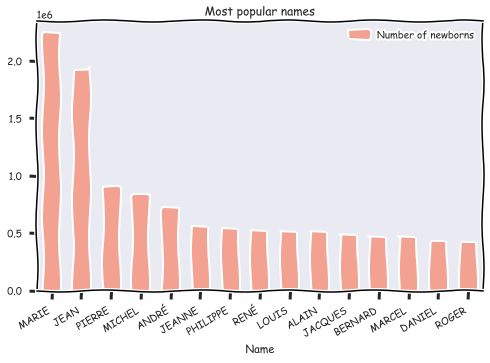

In [151]:
with plt.xkcd():
    most_popular.head(15).plot.bar(color='#f3a190')
    plt.title('Most popular names')
    plt.style.use('seaborn')
    plt.gcf().autofmt_xdate(rotation=30)
    # plt.savefig('static/most_popular_names.jpg')

#### Most popular female names in years 2000-2017

In [152]:
dataframe
dataframe.Years = pd.to_numeric(dataframe.Years,errors='coerce')

In [153]:
filter_female = (dataframe.Gender == 'female') & (dataframe.Years >= 2000) & (dataframe.Years <=2017)

In [154]:
dataframe_female = dataframe[filter_female]
female_number = dataframe_female.loc[:, ['Name','Number of newborns']]
female_number

,Name,Number of newborns
282737,AALIA,3
282738,AALIA,3
282739,AALIA,7
282741,AALIYA,7
282742,AALIYA,3
...,...,...
620988,ÖZLEM,6
620989,ÖZLEM,3
620990,ÖZLEM,5
620991,ÖZLEM,3


In [155]:
female_grouped = female_number.groupby(['Name']).sum()
female_grouped.drop('_PRENOMS_RARES', inplace=True)

female_grouped.loc['KETI', :]

Number of newborns    14
Name: KETI, dtype: int64

In [156]:
for_diagram = female_grouped.sort_values(by='Number of newborns', ascending=False).head(5)
for_diagram

,Number of newborns
Name,
EMMA,107705
LÉA,104370
MANON,94520
CHLOÉ,86167
CAMILLE,80502


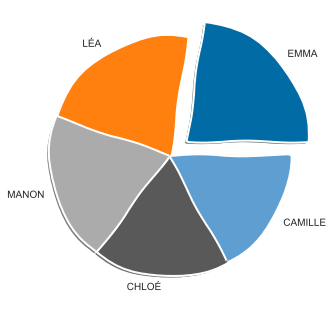

In [158]:
plt.style.use('tableau-colorblind10')
statistic = for_diagram.plot.pie(y='Number of newborns', explode =[0.2,0,0,0,0], legend=None, shadow=True)
statistic.set(ylabel=None)
# plt.savefig('static/female_names_2000_2017.jpg')

In [159]:
female_popular = female_grouped.sort_values(by='Number of newborns', ascending=False).head(50)
# female_popular.to_csv('static/most_popular_female.csv')

In [160]:
female_popular

,Number of newborns
Name,
EMMA,107705
LÉA,104370
MANON,94520
CHLOÉ,86167
CAMILLE,80502
JADE,73997
SARAH,70655
INÈS,68176
CLARA,66986


#### Most popular male names in years 2000-2017

In [162]:
dataframe.Years = pd.to_numeric(dataframe.Years,errors='coerce')
filter_male = (dataframe.Gender == 'male') & (dataframe.Years >= 2000) & (dataframe.Years <=2017)
dataframe_male = dataframe[filter_male]
male_number = dataframe_male.loc[:, ['Name','Number of newborns']]
male_number

,Name,Number of newborns
4,AADAM,4
5,AADAM,3
6,AADAM,4
7,AADAM,4
37,AADIL,3
...,...,...
282731,ÖMER,35
282732,ÖMER,39
282733,ÖMER,35
282734,ÖMER,56


In [163]:
male_grouped = male_number.groupby(['Name']).sum()
male_grouped.drop('_PRENOMS_RARES', inplace=True)
for_diagram_male = male_grouped.sort_values(by='Number of newborns', ascending=False).head(5)
for_diagram_male

,Number of newborns
Name,
LUCAS,121317
ENZO,99856
HUGO,95973
NATHAN,89699
THÉO,84660


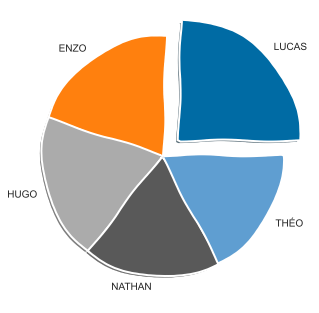

In [165]:
plt.style.use('tableau-colorblind10')
statistic = for_diagram_male.plot.pie(y='Number of newborns', explode =[0.2,0,0,0,0], legend=None, shadow=True)
statistic.set(ylabel=None)
# plt.savefig('static/male_names_2000_2017.jpg')

In [168]:
male_popular = male_grouped.sort_values(by='Number of newborns', ascending=False).head(50)
male_popular.to_csv('static/most_popular_male.csv')

In [167]:
male_popular

,Number of newborns
Name,
LUCAS,121317
ENZO,99856
HUGO,95973
NATHAN,89699
THÉO,84660
THOMAS,83832
LOUIS,83385
MATHIS,72753
LÉO,71527
